In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
df = pd.read_csv('Plant_health_data.csv')

In [4]:
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [5]:
df = df[5::6]
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
5,2024-10-04 16:54:53.407995,1,29.208365,24.364209,22.551551,46.392811,496.233040,6.157931,10.060115,15.610667,21.782672,45.052181,0.034302,High Stress
11,2024-10-06 04:54:53.407995,1,31.606611,23.994648,16.142863,58.531328,763.538197,6.278609,38.996321,36.368205,44.165868,49.124706,1.877493,Healthy
17,2024-10-07 16:54:53.407995,1,15.205038,23.634058,22.757719,40.837845,423.144215,6.151761,38.022040,29.993138,49.619687,43.205563,1.542697,High Stress
23,2024-10-09 04:54:53.407995,1,39.446354,24.289709,19.751061,50.561901,319.486823,6.961696,41.537469,31.346683,25.911649,49.566690,0.593445,Healthy
29,2024-10-10 16:54:53.407995,1,13.909169,21.951475,19.245784,42.409810,508.254863,6.242034,48.314877,35.848740,16.623274,32.258950,1.979705,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2024-10-27 04:54:53.493508,10,16.048611,29.612604,16.636631,45.464498,833.174659,7.427094,38.523345,18.318766,42.270118,20.092245,1.121254,High Stress
1181,2024-10-28 16:54:53.493508,10,13.592341,22.226379,19.295648,46.331118,505.769397,6.797664,20.545111,28.272306,30.017600,31.301474,0.274460,High Stress
1187,2024-10-30 04:54:53.493508,10,33.178691,22.556437,19.214508,61.881705,267.528665,5.870640,36.350168,27.579354,40.098887,43.579055,1.409170,Healthy
1193,2024-10-31 16:54:53.493508,10,11.790436,21.891448,22.466868,46.781881,859.507205,6.026423,37.320244,45.480831,29.543646,31.522679,1.660737,High Stress


In [6]:
df.index = pd.to_datetime(df['Timestamp'])
df[:26]

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
Timestamp,,,,,,,,,,,,,,
2024-10-04 16:54:53.407995,2024-10-04 16:54:53.407995,1,29.208365,24.364209,22.551551,46.392811,496.233040,6.157931,10.060115,15.610667,21.782672,45.052181,0.034302,High Stress
2024-10-06 04:54:53.407995,2024-10-06 04:54:53.407995,1,31.606611,23.994648,16.142863,58.531328,763.538197,6.278609,38.996321,36.368205,44.165868,49.124706,1.877493,Healthy
2024-10-07 16:54:53.407995,2024-10-07 16:54:53.407995,1,15.205038,23.634058,22.757719,40.837845,423.144215,6.151761,38.022040,29.993138,49.619687,43.205563,1.542697,High Stress
2024-10-09 04:54:53.407995,2024-10-09 04:54:53.407995,1,39.446354,24.289709,19.751061,50.561901,319.486823,6.961696,41.537469,31.346683,25.911649,49.566690,0.593445,Healthy
2024-10-10 16:54:53.407995,2024-10-10 16:54:53.407995,1,13.909169,21.951475,19.245784,42.409810,508.254863,6.242034,48.314877,35.848740,16.623274,32.258950,1.979705,High Stress
2024-10-12 04:54:53.407995,2024-10-12 04:54:53.407995,1,28.415886,27.423015,22.473691,66.148899,577.371603,6.754106,39.242889,11.239953,18.761138,41.738207,0.083466,Moderate Stress
2024-10-13 16:54:53.407995,2024-10-13 16:54:53.407995,1,32.383673,29.990886,20.698030,68.137636,711.343800,7.301299,38.246250,13.287242,23.529992,32.079306,0.478127,Healthy
2024-10-15 04:54:53.407995,2024-10-15 04:54:53.407995,1,39.094176,28.108534,17.678725,47.972101,327.490014,7.095556,14.691300,46.622765,12.701658,30.824844,1.208362,High Stress
2024-10-16 16:54:53.407995,2024-10-16 16:54:53.407995,1,22.272734,20.381409,23.189567,68.751221,251.474921,6.951088,20.599286,42.393502,11.166820,48.249913,1.599227,Moderate Stress


In [7]:
print(df.columns.tolist())

['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature', 'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status']


In [8]:
df = df[['Ambient_Temperature', 'Soil_Temperature', 'Humidity', 'Light_Intensity','Chlorophyll_Content', 'Electrochemical_Signal']]

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [10]:
def create_sequences(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [20]:
window_size = 5
X, y = create_sequences(scaled_data, window_size=5)
X.shape, y.shape

((195, 5, 6), (195, 6))

In [22]:
train_size = int(len(X) * 0.6)
val_size = int(len(X) * 0.2)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(InputLayer(input_shape=(5, 6)))  
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  


model.summary()

/Users/deepanshusingh/venvs/tf-env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,454 (79.90 KB)

 Trainable params: 20,454 (79.90 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
cp1 = ModelCheckpoint('best_model.keras', save_best_only=True)

model.compile(loss=MeanSquaredError(),
              optimizer=Adam(learning_rate=0.0001),
              metrics=[RootMeanSquaredError()])

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.3180 - root_mean_squared_error: 0.5639 - val_loss: 0.3042 - val_root_mean_squared_error: 0.5515
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3178 - root_mean_squared_error: 0.5638 - val_loss: 0.2967 - val_root_mean_squared_error: 0.5447
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3136 - root_mean_squared_error: 0.5600 - val_loss: 0.2893 - val_root_mean_squared_error: 0.5379
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3012 - root_mean_squared_error: 0.5488 - val_loss: 0.2820 - val_root_mean_squared_error: 0.5311
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2931 - root_mean_squared_error: 0.5414 - val_loss: 0.2748 - val_root_mean_squared_error: 0.5243
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2900 - root_mean_squared_error: 0.5385 - val_loss: 0.2678 - val_root_mean_squared_error: 0.5175
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2746

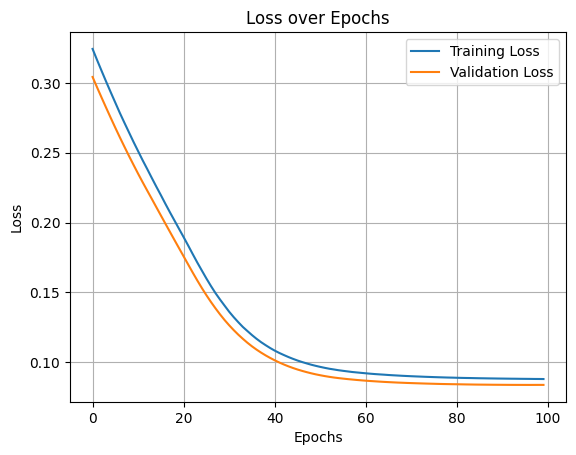

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

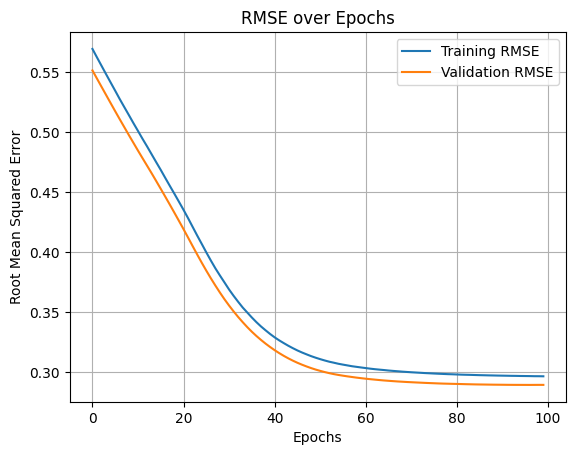

In [34]:
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [40]:

train_pred = model.predict(X_train)

pred_df = pd.DataFrame(train_pred, columns=[f'Pred_{i+1}' for i in range(train_pred.shape[1])])
actual_df = pd.DataFrame(y_train, columns=[f'Actual_{i+1}' for i in range(y_train.shape[1])])

train_results = pd.concat([pred_df, actual_df], axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


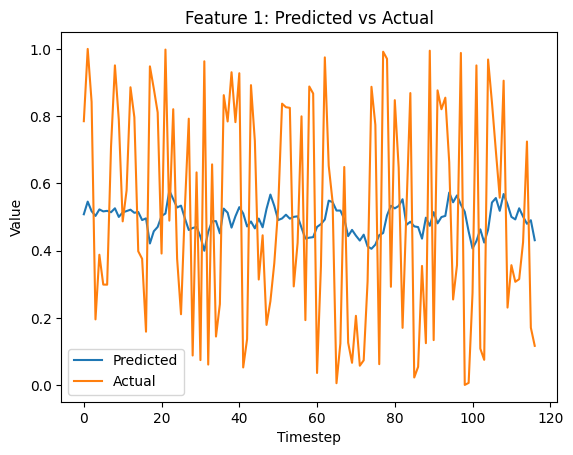

In [42]:
plt.plot(train_results['Pred_1'], label='Predicted')
plt.plot(train_results['Actual_1'], label='Actual')
plt.legend()
plt.title('Feature 1: Predicted vs Actual')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.show()

In [44]:
train_results

,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_6,Actual_1,Actual_2,Actual_3,Actual_4,Actual_5,Actual_6
0,0.508065,0.467099,0.499905,0.478291,0.531113,0.449130,0.784965,0.747415,0.873251,0.475055,0.730517,0.029483
1,0.545669,0.490975,0.521443,0.519298,0.567515,0.513672,1.000000,0.569383,0.939758,0.644486,0.404544,0.229925
2,0.517272,0.473992,0.490643,0.487183,0.540140,0.501518,0.842370,0.266659,0.265382,0.159037,0.362208,0.600799
3,0.503153,0.486508,0.482366,0.474430,0.545371,0.490947,0.195295,0.819191,0.960277,0.062903,0.950276,0.799313
4,0.522479,0.483543,0.519271,0.502439,0.560782,0.510735,0.387637,0.427976,0.390322,0.644745,0.031585,0.977672
...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.525853,0.489448,0.514216,0.516049,0.551095,0.509515,0.315034,0.552812,0.023618,0.894654,0.016903,0.220327
113,0.501299,0.445709,0.471118,0.502129,0.506026,0.514579,0.424831,0.062553,0.196033,0.101192,0.268190,0.521879
114,0.479704,0.444030,0.457181,0.467942,0.494887,0.491948,0.724474,0.271752,0.344598,0.801278,0.453395,0.954183
115,0.490226,0.457345,0.458808,0.467944,0.502686,0.465658,0.170648,0.395133,0.348006,0.324344,0.384879,0.004638


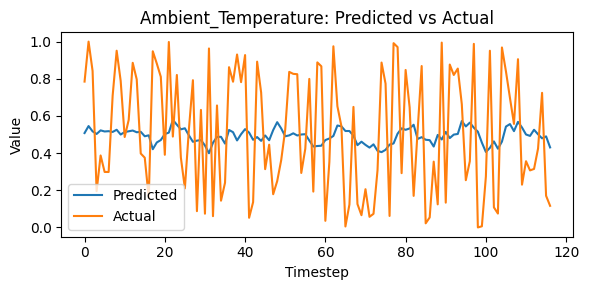

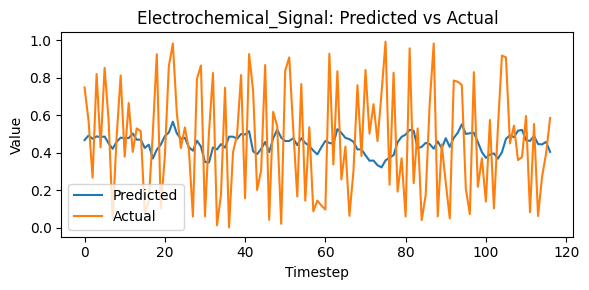

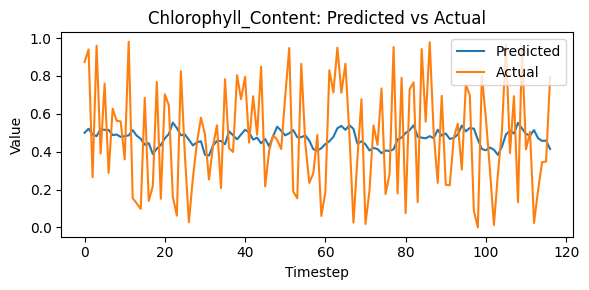

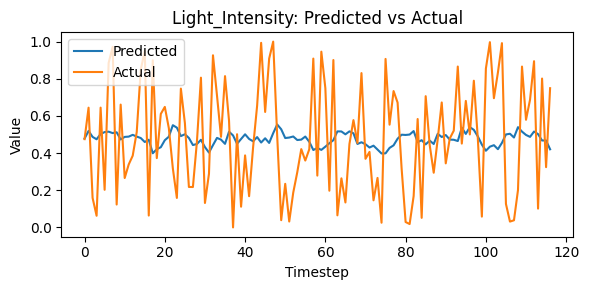

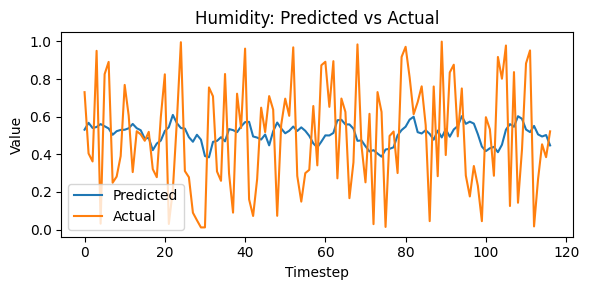

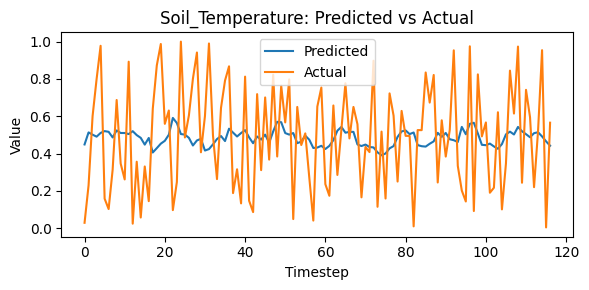

In [48]:
for i in range(1, 7):  
    plt.figure(figsize=(6, 3))
    plt.plot(train_results[f'Pred_{i}'], label='Predicted')
    plt.plot(train_results[f'Actual_{i}'], label='Actual')
    plt.legend()
    plt.title(f'{df.columns[1-i]}: Predicted vs Actual')
    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

In [60]:
combined_scaled = np.vstack((train_pred, y_train))  
combined_inversed = scaler.inverse_transform(combined_scaled)

In [52]:
n_samples = train_pred.shape[0]
inversed_pred = combined_inversed[:n_samples]
inversed_actual = combined_inversed[n_samples:]

In [54]:
inversed_df = pd.DataFrame(
    np.hstack((inversed_pred, inversed_actual)),
    columns=[f'Pred_{i+1}' for i in range(6)] + [f'Actual_{i+1}' for i in range(6)]
)

In [58]:
print(inversed_df.head())


      Pred_1     Pred_2     Pred_3      Pred_4     Pred_5    Pred_6  \
0  24.116383  19.677876  54.984915  579.930027  35.829671  0.909732   
1  24.565436  19.916005  55.628956  612.355475  36.908310  1.036812   
2  24.226328  19.746625  54.707970  586.960987  36.097156  1.012882   
3  24.057727  19.871455  54.460475  576.877098  36.252153  0.992067   
4  24.288511  19.841887  55.564011  599.024832  36.708799  1.031029   

    Actual_1   Actual_2   Actual_3    Actual_4   Actual_5  Actual_6  
0  27.423015  22.473691  66.148899  577.371603  41.738207  0.083466  
1  29.990886  20.698030  68.137636  711.343800  32.079306  0.478127  
2  28.108534  17.678725  47.972101  327.490014  30.824844  1.208362  
3  20.381409  23.189567  68.751221  251.474921  48.249913  1.599227  
4  22.678283  19.287669  51.708114  711.548334  21.028139  1.950407  
